In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
### set up import

import geometry as gm
import processing as pr
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib inline

## Getting the data

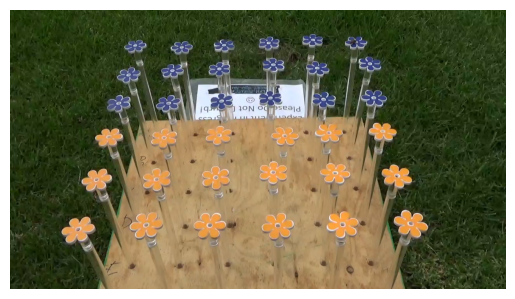

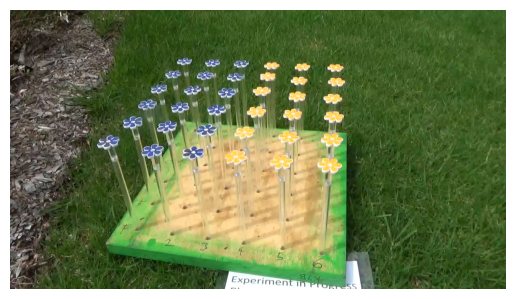

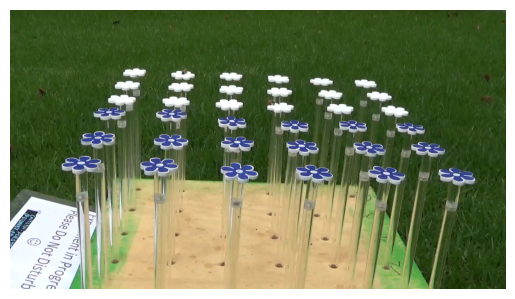

In [9]:
frame = gm.openFirstFrame("video/MAH00065.MP4")
frame2 = gm.openFirstFrame("video/MAH00129.MP4")
frame3 = gm.openFirstFrame("video/MAH00060.MP4")
plt.imshow(frame)
plt.axis('off')
plt.show()

plt.imshow(frame2)
plt.axis('off')
plt.show()

plt.imshow(frame3)
plt.axis('off')
plt.show()

Finish the selection process by pressing ESC button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press S

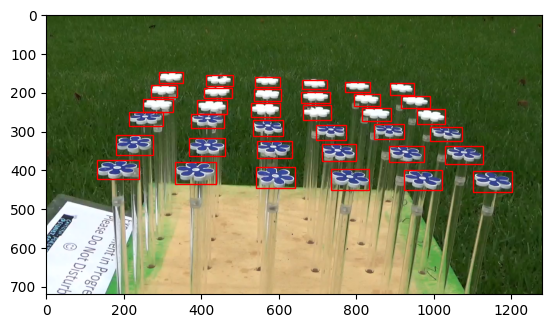

In [11]:
rois = gm.getRegionsOfInterest(frame3)

np.save("dataset/roi-3", rois)
np.save("dataset/roi/roi-3", rois)
gm.drawBoundingBox(rois, frame3)


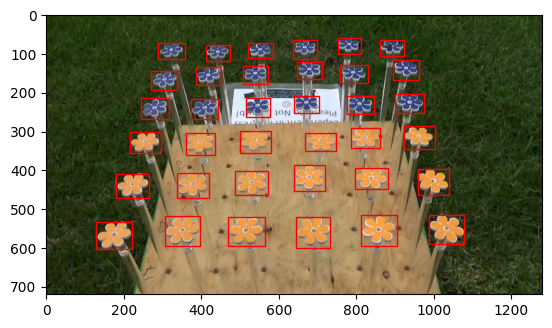

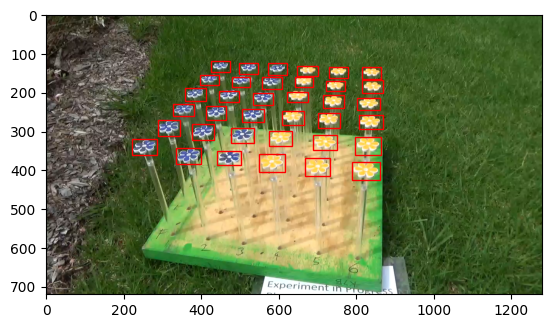

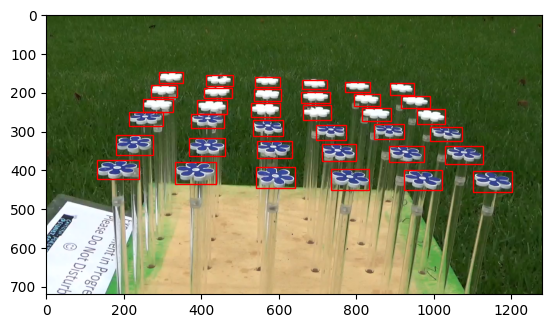

In [12]:
roiFile = np.load("dataset/roi/roi-1.npy")
gm.drawBoundingBox(roiFile,frame)

roiFile = np.load("dataset/roi/roi-2.npy")
gm.drawBoundingBox(roiFile,frame2)

roiFile = np.load("dataset/roi/roi-3.npy")
gm.drawBoundingBox(roiFile,frame3)

-- 20 -- [987 514  91  77]
602 1280
(720, 1280, 3)
(703, 678, 3)


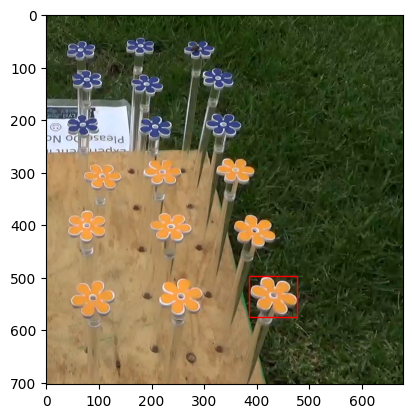

In [7]:
roiFile = np.load("dataset/roi/roi-1.npy")
i = 20
derivation = 10
img = frame
roi = roiFile[i]

print(f"-- {i} -- {roi}")

extXBot, extXTop, extYBot, extYTop = gm.generateOffset(roi, img.shape, derivation)

xb = roi[0]-extXBot
xt = roi[0]+roi[2]+extXTop

yb = roi[1]-extYBot
yt = roi[1]+roi[3]+extYTop

print(xb, xt)
print(img.shape)

#slicing is row major
subPic = img[yb:yt,xb:xt]

#bounding box is collum major
subDict = {"name":"test", "roi": [extXBot,
                                    extYBot,
                                    roi[2],
                                    roi[3]]}

print(subPic.shape)

gm.drawBoundingBox([subDict["roi"]],subPic)

In [19]:
roiFile1 = np.load("dataset/roi/roi-1.npy")
roiFile2 = np.load("dataset/roi/roi-2.npy")
roiFile3 = np.load("dataset/roi/roi-3.npy")

for i in range(2, 10, 2):
    gm.extractAndSave(roiFile1,frame,f"a-{i}","dataset/flower/spread-out-large/", i)
    gm.extractAndSave(roiFile2,frame2,f"b-{i}","dataset/flower/spread-out-large/", i)
    gm.extractAndSave(roiFile3,frame3,f"c-{i}","dataset/flower/spread-out-large/", i)

In [22]:
dictArr = np.load("dataset/flower/spread-out-large/dict-b-8.npy",allow_pickle=True)


{'name': 'flower-b-8-22.png', 'roi': [28, 167, 50, 31]}


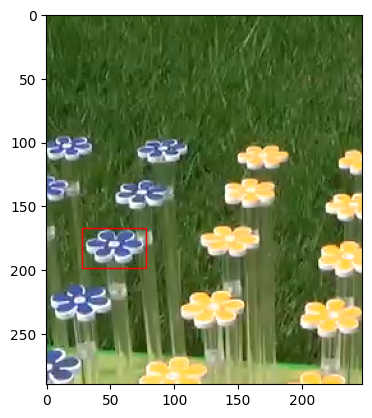

In [23]:
data = dictArr[22]
print(data)

subimg = plt.imread("dataset/flower/spread-out-large/"+data['name'])

gm.drawBoundingBox([data["roi"]],subimg)

## Data augementation

In [127]:
import tensorflow as tf

from keras import layers

### data augmentation

In [113]:
def randomResizeImg(x):
    width = x.shape[0]
    height = x.shape[1]
    factor = tf.random.uniform([],0.2,1.2)
    return tf.image.resize(x, [width*factor, height*factor])

def randomResize():
    return layers.Lambda(lambda x: randomResizeImg(x))

dataAugmentation = tf.keras.Sequential([
    layers.RandomBrightness(0.4, (0.0,1.0)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1,"nearest"),
    randomResize()
    ])